In [3]:
# Cell 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Cell 2: Load the dataset
file_path = "C:\\Users\\usman\\OneDrive\\Desktop\\CogniSense\\final_data_set.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
print("Initial DataFrame:")
print(data.head())

Initial DataFrame:
             Unnamed: 0         Unnamed: 1                 Unnamed: 2  \
0                  Size         Complexity  Requirement\nUncertainity   
1  Small\nMedium\nLarge  Low\nMedium\nHigh          Low\nMedium\nHigh   
2                     M                  H                          L   
3                     M                  H                          M   
4                     M                  H                          L   

    Project data set                Unnamed: 4        Unnamed: 5  \
0   Time\nConstraint  Attainable \nInformation   Process \nTime    
1  Low\nMedium\nHigh       Nil\nLesser\nHigher     New\nExisting   
2                  L                         L                 N   
3                  L                         L                 N   
4                  M                         L                 N   

                             Unnamed: 6                       Unnamed: 7  \
0                        Process \nTime            Type o

In [5]:
# Cell 3: Clean the data
# Assuming the first row of data are column names
data.columns = data.iloc[0].str.strip()
data = data[1:]
data.reset_index(drop=True, inplace=True)

# Replace new line characters in column names
data.columns = data.columns.str.replace('\n', ' ')

# Replace new line characters in data
data.replace('\n', ' ', regex=True, inplace=True)

# Fill missing column names with placeholder
data.columns = [f'Column_{i}' if pd.isna(col) else col for i, col in enumerate(data.columns)]
print("Column names after handling missing values:")
print(data.columns)  # Verify the placeholder columns

# Handle duplicate column names by appending a suffix
data = data.loc[:, ~data.columns.duplicated()]
print("Column names after removing duplicates:")
print(data.columns)  # Verify column names after removing duplicates

# Print the cleaned dataframe to verify changes
print("Cleaned DataFrame:")
print(data.head())


Column names after handling missing values:
Index(['Size', 'Complexity', 'Requirement Uncertainity', 'Time Constraint',
       'Attainable  Information', 'Process  Time', 'Process  Time',
       'Type of  Information', 'Experience with ET', 'Formal Trainning',
       'Elicitation  Experience', 'Domain Experience', 'Problem Understanding',
       'People Per Section', 'Experience', 'Time Availability', 'Location',
       'Expressiveness', 'Particpation', 'Attributes'],
      dtype='object')
Column names after removing duplicates:
Index(['Size', 'Complexity', 'Requirement Uncertainity', 'Time Constraint',
       'Attainable  Information', 'Process  Time', 'Type of  Information',
       'Experience with ET', 'Formal Trainning', 'Elicitation  Experience',
       'Domain Experience', 'Problem Understanding', 'People Per Section',
       'Experience', 'Time Availability', 'Location', 'Expressiveness',
       'Particpation', 'Attributes'],
      dtype='object')
Cleaned DataFrame:
            

In [6]:
# Cell 4: Handle missing values and encode categorical variables
# Fill NaN with a placeholder or use imputation strategies
data.fillna('Missing', inplace=True)

# Verify data types
print("Data types after filling missing values:")
print(data.dtypes)

# Check the data structure and content
print(data.info())
print(data.head())

# Encode categorical variables into numerical values
for column in data.columns:
    if data[column].dtype == 'object':  # Ensure we only encode non-numeric columns
        print(f'Processing column: {column}, Type: {data[column].dtype}')  # Debugging line
        data[column] = data[column].astype('category').cat.codes

# Verify the changes
print("DataFrame after encoding categorical variables:")
print(data.head())

# Ensure 'Attributes' column exists
print("Column names before preparing features and target:")
print(data.columns)

Data types after filling missing values:
Size                        object
Complexity                  object
Requirement Uncertainity    object
Time Constraint             object
Attainable  Information     object
Process  Time               object
Type of  Information        object
Experience with ET          object
Formal Trainning            object
Elicitation  Experience     object
Domain Experience           object
Problem Understanding       object
People Per Section          object
Experience                  object
Time Availability           object
Location                    object
Expressiveness              object
Particpation                object
Attributes                  object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Size                      2294 non-null   object
 1   Comple

In [7]:
# Cell 5: Prepare features (X) and target (y)
if 'Attributes' not in data.columns:
    print("Error: 'Attributes' column not found in the dataset.")
else:
    X = data.drop('Attributes', axis=1)
    y = data['Attributes']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    

In [8]:
# Cell 6: Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [9]:
# Cell 7: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [10]:
# Cell 8: Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.25      0.40         4
           2       0.64      0.41      0.50        17
           3       1.00      1.00      1.00        14
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       1.00      0.62      0.76        13
           7       0.86      0.99      0.92       163
           8       0.83      0.62      0.71         8
          10       0.80      1.00      0.89         4
          11       0.87      0.94      0.90        63
          12       0.97      0.96      0.96        71
          13       0.82      1.00      0.90        50
          14       0.86      0.48      0.62        25
          15       0.90      0.56      0.69        16

    accuracy                           0.88       459
   macro avg       0.77      0.62      0.66       459
we

C:\Users\usman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\usman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\usman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Cell 9: Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8758169934640523


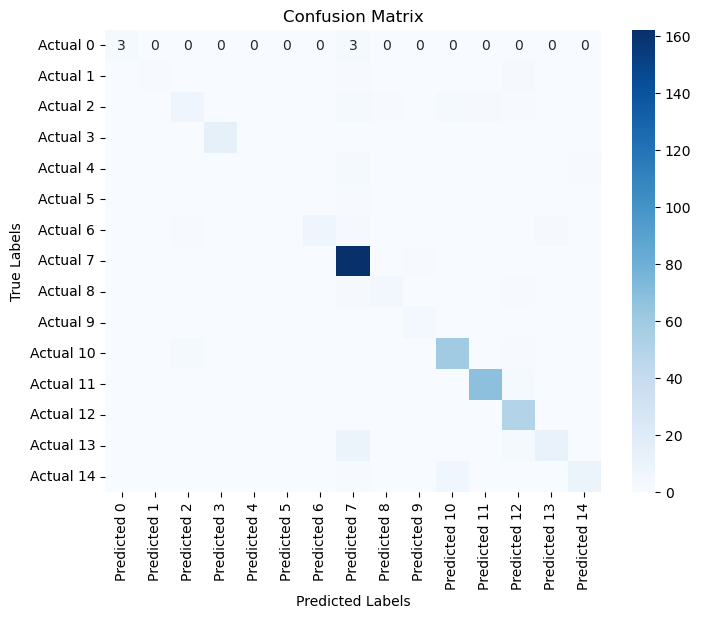

In [12]:
# Cell 10: Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
index = [f'Actual {i}' for i in range(cm.shape[0])]
columns = [f'Predicted {i}' for i in range(cm.shape[1])]
cm_df = pd.DataFrame(cm, index=index, columns=columns)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

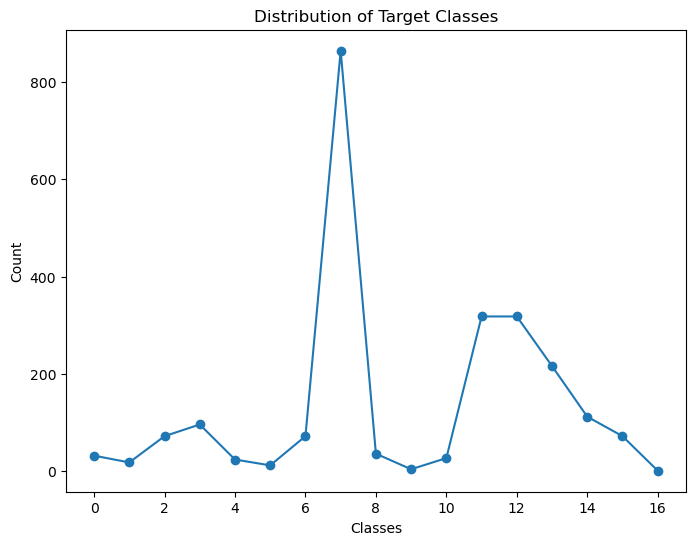

In [13]:

# Create a line chart
plt.figure(figsize=(8, 6))
data['Attributes'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


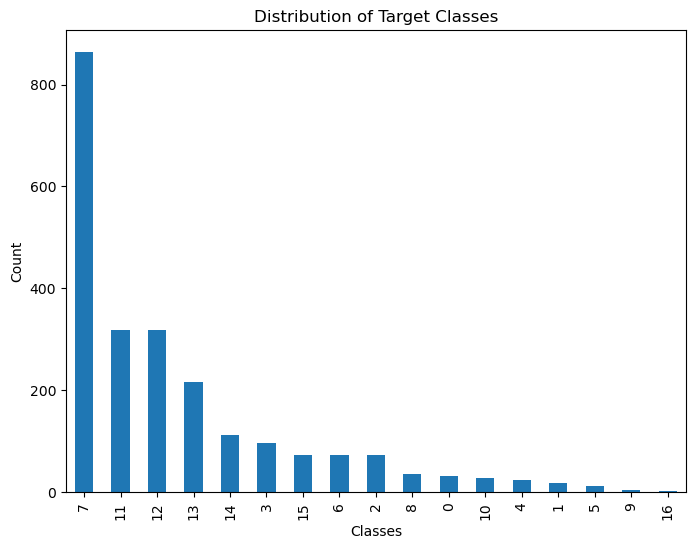

In [14]:

# Create a bar chart
plt.figure(figsize=(8, 6))
data['Attributes'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


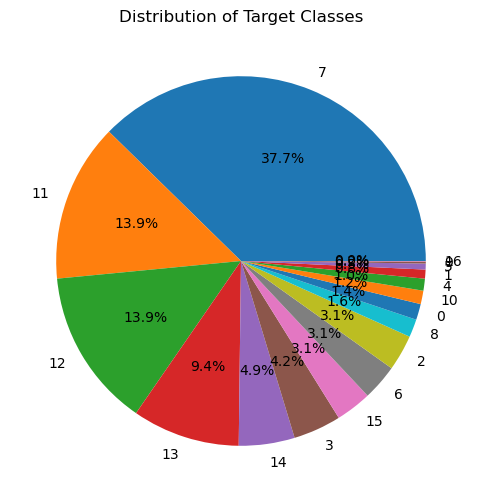

In [15]:
# Create a pie chart
plt.figure(figsize=(8, 6))
data['Attributes'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target Classes')
plt.ylabel('')
plt.show()
